In [101]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)
#warnings.filterwarnings("ignore", category=SettingWithCopyWarning)

# Disable SettingWithCopyWarning
pd.options.mode.chained_assignment = None






In [102]:
def day_trader_strategy(ticker):
    # Get stock data from Yahoo Finance
    stock_data = yf.download(ticker, period="1d", interval="5m")
    
    # Calculate moving averages
    ema9 = stock_data['Close'].ewm(span=9).mean()
    ema13 = stock_data['Close'].ewm(span=13).mean()

    
    # Create a DataFrame to store signals
    signals = pd.DataFrame(index=stock_data.index)
    signals['position'] = 0
    
    # Determine when to enter and exit the market
    signals['short_ema'] = ema9
    signals['long_ema'] = ema13
    signals.loc[9:, 'position'] = np.where(signals['short_ema'][9:] > signals['long_ema'][9:], 1, 0)
    signals.loc[13:, 'position'] = np.where(signals['short_ema'][13:] < signals['long_ema'][13:], -1, signals['position'][13:])
    signals['position'] = signals['position'].ffill().fillna(0)
    
    # Plot the chart
    fig, ax = plt.subplots(figsize=(16,9))
    ax.plot(stock_data.index, stock_data['Close'], label='Close Price')
   # ax.plot(signals.loc[signals.position == 1.0].index, stock_data['Close'][signals.position == 1.0], '^', markersize=10, color='g', label='Buy')
   # ax.plot(signals.loc[signals.position == -1.0].index, stock_data['Close'][signals.position == -1.0], 'v', markersize=10, color='r', label='Sell')
    ax.plot(ema9.index, ema9, label='9 EMA')
    ax.plot(ema13.index, ema13, label='13 EMA')
    ax.legend(loc='upper left')
    ax.set_xlabel('Date')
    ax.set_ylabel('Price ($)')
    plt.show()

    return signals

In [103]:
def swing_trader_strategy(ticker):
    # Get stock data from Yahoo Finance
    stock_data = yf.download(ticker, period="1y", interval="1d")
    
    # Calculate moving averages
    ema20 = stock_data['Close'].ewm(span=20).mean()
    ema100 = stock_data['Close'].ewm(span=100).mean()
    
    # Create a DataFrame to store signals
    signals = pd.DataFrame(index=stock_data.index)
    signals['position'] = 0
    
    # Determine when to enter and exit the market
    signals['short_ema'] = ema20
    signals['long_ema'] = ema100
    signals['position'][20:] = np.where(signals['short_ema'][20:] > signals['long_ema'][20:], 1, 0)
    signals['position'][100:] = np.where(signals['short_ema'][100:] < signals['long_ema'][100:], -1, signals['position'][100:])
    signals['position'] = signals['position'].ffill().fillna(0)
    
    # Plot the chart
    fig, ax = plt.subplots(figsize=(16,9))
    ax.plot(stock_data.index, stock_data['Close'], label='Close Price')
   # ax.plot(signals.loc[signals.position == 1.0].index, stock_data['Close'][signals.position == 1.0], '^', markersize=10, color='g', label='Buy')
   # ax.plot(signals.loc[signals.position == -1.0].index, stock_data['Close'][signals.position == -1.0], 'v', markersize=10, color='r', label='Sell')
    ax.plot(ema20.index, ema20, label='20 EMA')
    ax.plot(ema100.index, ema100, label='100 EMA')
    ax.legend(loc='upper left')
    ax.set_xlabel('Date')
    ax.set_ylabel('Price ($)')
    plt.show()
    
    return signals


In [104]:
def long_term_trader_strategy(ticker):
    # Get stock data from Yahoo Finance
    stock_data = yf.download(ticker, period="5y", interval="1d")
    
    # Calculate moving averages
    ema50 = stock_data['Close'].ewm(span=50).mean()
    ema100 = stock_data['Close'].ewm(span=100).mean()
    ema200 = stock_data['Close'].ewm(span=200).mean()
    
    # Create a DataFrame to store signals
    signals = pd.DataFrame(index=stock_data.index)
    signals['position'] = 0
    
    # Determine when to enter and exit the market
    signals['short_ema'] = ema50
    signals['medium_ema'] = ema100
    signals['long_ema'] = ema200
    signals.loc[50:, 'position'] = np.where(signals['short_ema'][50:] > signals['long_ema'][50:], 1, 0)
    signals.loc[50:, 'position'] = np.where(signals['short_ema'][50:] < signals['medium_ema'][50:], -1, signals['position'][50:])
    signals['position'][200:] = np.where(signals['short_ema'][200:] < signals['long_ema'][200:], -1, signals['position'][200:])
    signals['position'] = signals['position'].ffill().fillna(0)
    
    # Plot the chart
    fig, ax = plt.subplots(figsize=(16,9))
    ax.plot(stock_data.index, stock_data['Close'], label='Close Price')
    #ax.plot(signals.loc[signals.position == 1.0].index, stock_data['Close'][signals.position == 1.0], '^', markersize=10, color='g', label='Buy')
    #ax.plot(signals.loc[signals.position == -1.0].index, stock_data['Close'][signals.position == -1.0], 'v', markersize=10, color='r', label='Sell')
    ax.plot(ema50.index, ema50, label='50 EMA')
    ax.plot(ema100.index, ema100, label='100 EMA')
    ax.plot(ema200.index, ema200, label='200 EMA')
    ax.legend(loc='upper left')
    ax.set_xlabel('Date')
    ax.set_ylabel('Price ($)')
    plt.show()
    
    return signals

    



Enter the ticker symbol of the stock:  aapl
Choose a strategy (1 = day trader, 2 = swing trader, 3 = long-term trader):  3


[*********************100%***********************]  1 of 1 completed


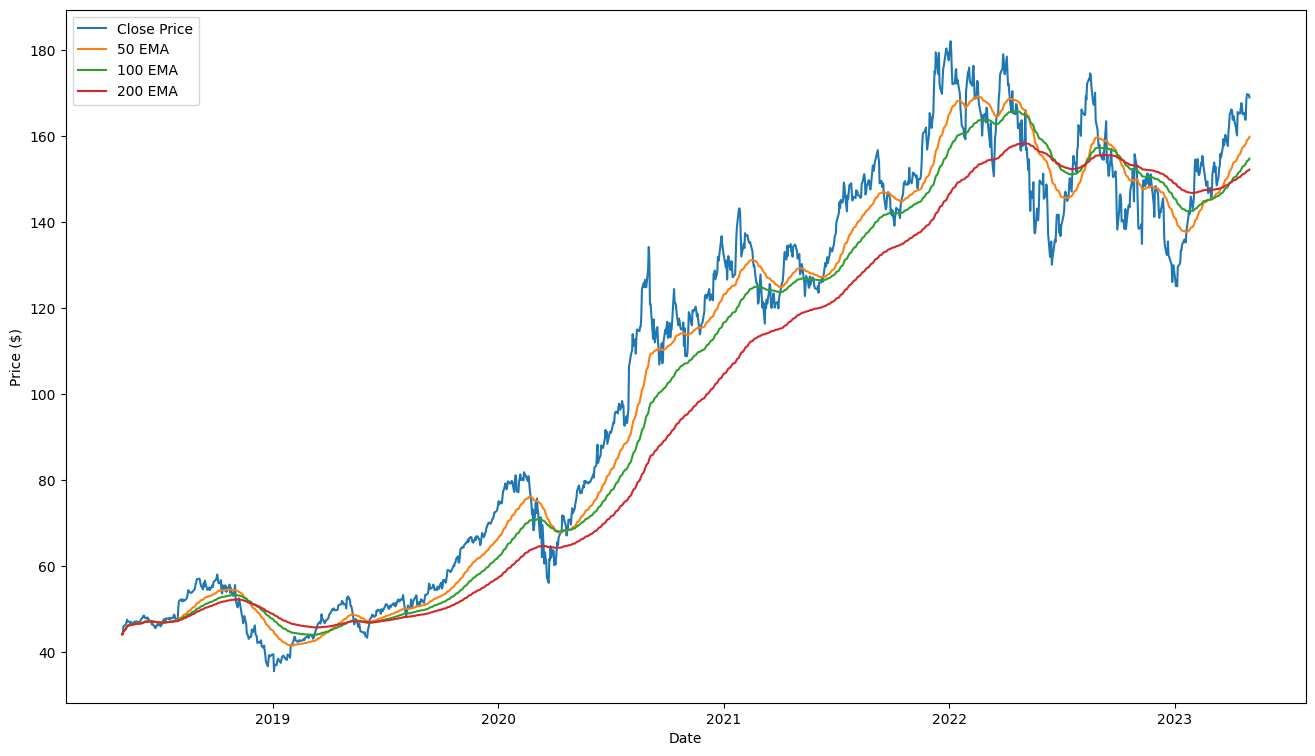

            position   short_ema  medium_ema    long_ema
Date                                                    
2018-05-02         0   44.142502   44.142502   44.142502
2018-05-03         0   44.183301   44.182901   44.182701
2018-05-04         0   44.798511   44.786304   44.780227
2018-05-07         0   45.194048   45.173580   45.163351
2018-05-08         0   45.479247   45.452182   45.438604
...              ...         ...         ...         ...
2023-04-26         1  158.154528  153.525034  151.480643
2023-04-27         1  158.556704  153.819786  151.649095
2023-04-28         1  158.992911  154.133850  151.828508
2023-05-01         1  159.408483  154.439912  152.005240
2023-05-02         1  159.782464  154.727142  152.173795

[1259 rows x 4 columns]


In [105]:
# Ask user for input
ticker = input("Enter the ticker symbol of the stock: ")
strategy_choice = input("Choose a strategy (1 = day trader, 2 = swing trader, 3 = long-term trader): ")

# Execute the chosen EMA crossover strategy and plot the results
if strategy_choice == "1":
    signals = day_trader_strategy(ticker)
    print(signals)
elif strategy_choice == "2":
    signals = swing_trader_strategy(ticker)
    print(signals)
elif strategy_choice == "3":
    signals = long_term_trader_strategy(ticker)
    print(signals)
else:
    print("Invalid strategy choice.")
    
# Re-enable SettingWithCopyWarning
pd.options.mode.chained_assignment = 'warn'
